In [1]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
import matplotlib.pyplot as plt
import sys
%matplotlib inline



In [8]:
!pwd

/Users/liam/cos435_project


In [22]:
import pandas as pd
train = pd.read_csv("/Users/liam/cos435_project/dataset/MathDial_map_back_4_actions.csv", sep="\t")
train.tail()

,misconception_type,convo_turn,done,previous_action_id,listen_to_feedback,problem_progress,progress_delta,correct_solution,next_action_hint_strength,next_action_id
12012,2,25,0,60.0,0,50,50,0,2,0
12013,2,26,0,2.0,1,50,0,0,2,0
12014,2,27,0,2.0,0,40,-10,0,3,0
12015,2,28,0,13.0,1,75,35,0,2,0
12016,2,29,0,2.0,1,75,0,0,3,2


In [87]:
import matplotlib.pyplot as plt

t = train_dataset["problem_progress"].unique()
t.sort()
t

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  50,  60,  65,  70,
        75,  80,  85,  90,  95, 100])

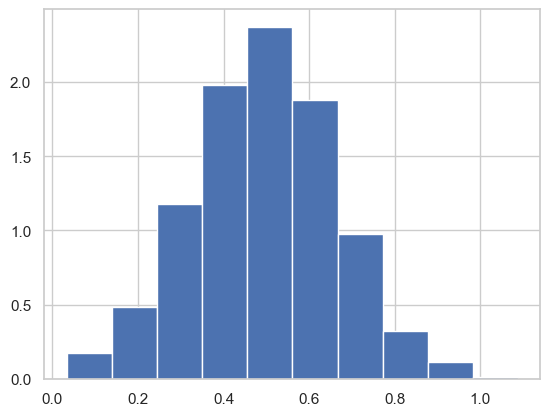

In [65]:
plt.hist((np.random.normal(loc=0, scale=1.0, size = 1000) - -3) / (3 - -3), density=True)
plt.show()

In [1]:
# Simulator

In [1]:
from env import simulator

In [2]:
env = simulator("/Users/liam/cos435_project/dataset/MathDial_map_back_4_actions.csv")

In [3]:
s, _ = env.reset()

# ['misconception_type', 'convo_turn','done','listen_to_feedback','problem_progress','progress_delta','correct_solution']
s

(5, 0, 0, 0, 0, 0, 0)

In [4]:
import numpy as np
np.arange(3)

array([0, 1, 2])

In [5]:
# "Focus": 0,
# "Probing": 1,
# "Telling": 2,
# "Generic": 3,
# self.action = [0,1,2,3]
traj = []
env.reset()

for i in range(1000):
    a = np.random.choice(4)
    s, r, done, _, _ = env.step(a)
    if done:
        env.reset()
    traj.append(list(s))


In [6]:
traj

[[2, 1, 0, 1, 5, 5, 0],
 [2, 2, 0, 0, 15, 10, 0],
 [2, 3, 0, 0, 20, 5, 0],
 [2, 4, 1, 0, 100, 80, 1],
 [1, 1, 0, 1, 10, 10, 0],
 [1, 2, 0, 1, 20, 10, 0],
 [1, 3, 0, 0, 30, 10, 0],
 [1, 4, 0, 1, 40, 10, 0],
 [1, 5, 0, 1, 50, 10, 0],
 [1, 6, 1, 1, 55, 5, 0],
 [2, 1, 0, 1, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0],
 [2, 3, 0, 0, 5, 5, 0],
 [2, 4, 0, 1, 5, 0, 0],
 [2, 5, 0, 1, 10, 5, 0],
 [2, 6, 0, 1, 15, 5, 0],
 [2, 7, 1, 0, 100, 85, 1],
 [5, 1, 0, 1, 10, 10, 0],
 [5, 2, 1, 1, 5, -5, 0],
 [5, 1, 0, 1, 5, 5, 0],
 [5, 2, 0, 1, 5, 0, 0],
 [5, 3, 0, 1, 0, -5, 0],
 [5, 4, 1, 0, 10, 10, 0],
 [4, 1, 0, 0, 10, 10, 0],
 [4, 2, 0, 1, 15, 5, 0],
 [4, 3, 0, 1, 25, 10, 0],
 [4, 4, 0, 0, 30, 5, 0],
 [4, 5, 1, 1, 100, 70, 1],
 [2, 1, 0, 1, 0, 0, 0],
 [2, 2, 0, 1, 5, 5, 0],
 [2, 3, 0, 1, 10, 5, 0],
 [2, 4, 0, 1, 20, 10, 0],
 [2, 5, 0, 0, 30, 10, 0],
 [2, 6, 0, 1, 35, 5, 0],
 [2, 7, 1, 0, 35, 0, 0],
 [2, 1, 0, 0, 0, 0, 0],
 [2, 2, 0, 1, 0, 0, 0],
 [2, 3, 0, 0, 5, 5, 0],
 [2, 4, 0, 0, 10, 5, 0],
 [2, 5, 0, 0, 10, 0

In [7]:
r

np.int64(18)

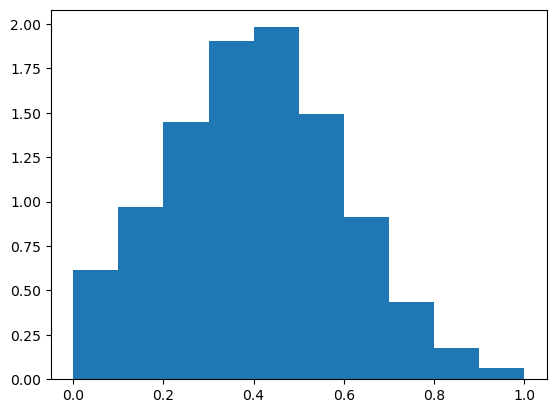

In [35]:
import matplotlib.pyplot as plt
ns = []
for i in range(10000):
    n = max(0, min(1, np.random.normal(loc=0.4, scale=0.2)))
    ns.append(n)
plt.hist(ns, density=True)
plt.show()

In [13]:
# policy evaluation with Monte Carlo
def eval_policy(policy, env_name, seed, eval_episodes=10):
        eval_env = gym.make(env_name)
        eval_env.reset(seed=seed)
        avg_reward = 0.
        for _ in range(eval_episodes):
            state, _ = eval_env.reset()
            done = False
            step = 0
            while not done:
                action = policy.select_action(np.array(state))
                state, reward, terminated, truncated, _ = eval_env.step(action)
                avg_reward += reward
                step += 1
                done = terminated or truncated
        avg_reward /= eval_episodes

        print("---------------------------------------")
        print(f"Evaluation over {eval_episodes} episodes: {avg_reward:.3f}")
        print("---------------------------------------")
        return avg_reward